In [1]:
# Colin Crowe 5/8/2022

import random
import utils
import numpy as np
import matplotlib.pyplot as plt

By now, I've explained what Chargaff's Second Parity Rule is, and introduced you to this graph that I'll be referencing as we go. If you don't know what this means, check out the "problem" file first before jumping in here.

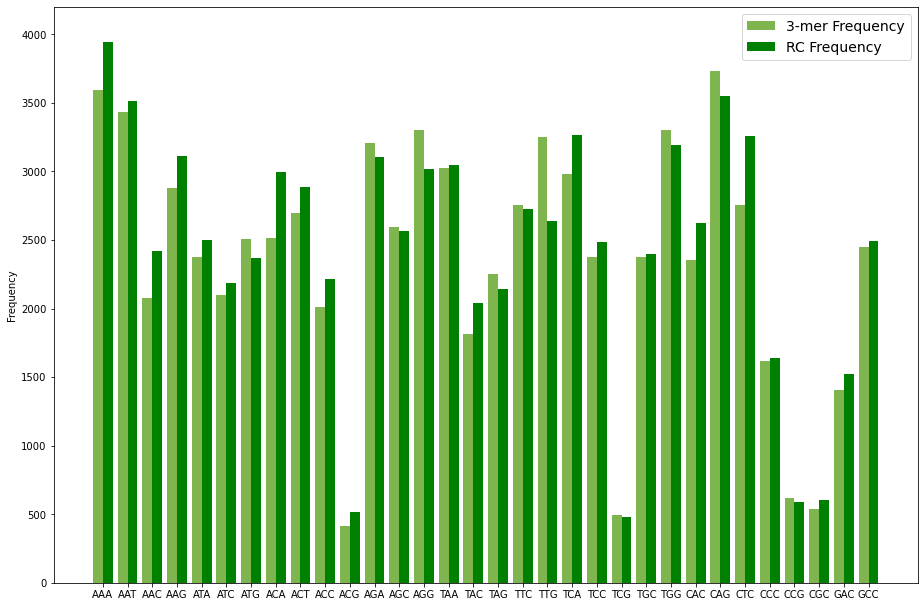

In [2]:
BRCA1 = utils.dump_graph()

The first potential explanation is also the simplest - what if the second parity rule is just the result of random chance?

To investigate, I wrote some code that would generate a random sequence of A's, T's, C's, and G's. Sure, enough this does obey the second parity rule!

(0.0, 4200.0)

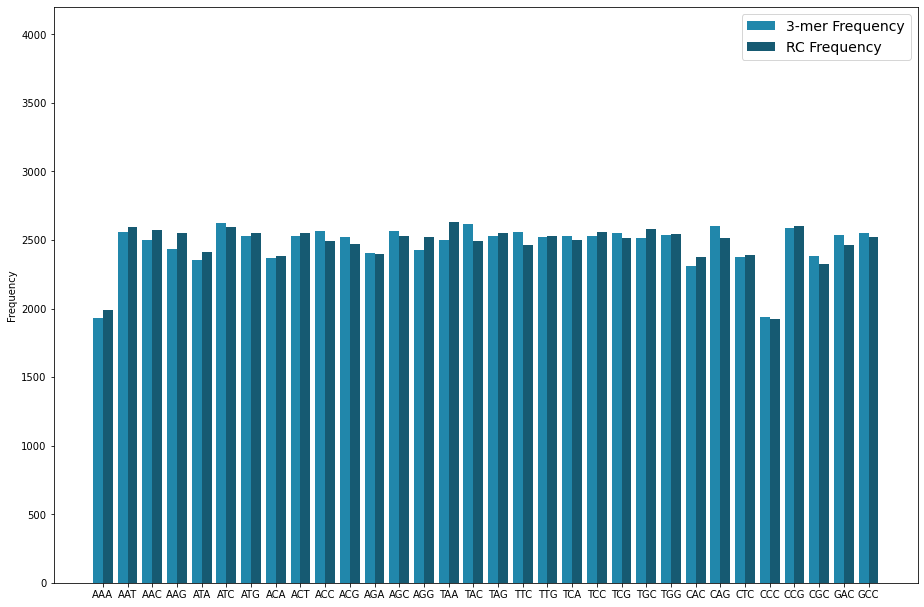

In [3]:
sequence = utils.random_sequence(len(BRCA1))
three_mers = utils.get_3mers()
tmer_count, rc_count = utils.count_kmers(sequence, three_mers)
empty = []
for i in range(32):
    empty.append(0)

data = [tmer_count, rc_count]
X = np.arange(32)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[0], color = '#2187ab', width = 0.4)
ax.bar(X + 0.2, data[1], color = '#165a72', width = 0.4)
ax.bar(three_mers, empty)
ax.set_ylabel('Frequency')
plt.legend(['3-mer Frequency', 'RC Frequency'],loc=1,prop={'size': 14})
plt.ylim([0, 4200])

This still isn't great, though. Here we see the counts of each 3-mer are roughly uniform, whereas in the actual dataset they vary wildly. I've scaled both of these graphs to have the same y-axis to aid in comparing them.

However, the counts are only uniform because I modeled this using a uniform distribution. In reality, the distribution of A's, T's, C's, and G's isn't uniform. For instance, the percentage of DNA that's made up of C or G nucleotides matters a great deal when determining a strand's melting point. In humans, this percentage is about 40%, give or take. What would happen if I generated a random sequence with the same %CG content as the BRCA1 gene?

(0.0, 4200.0)

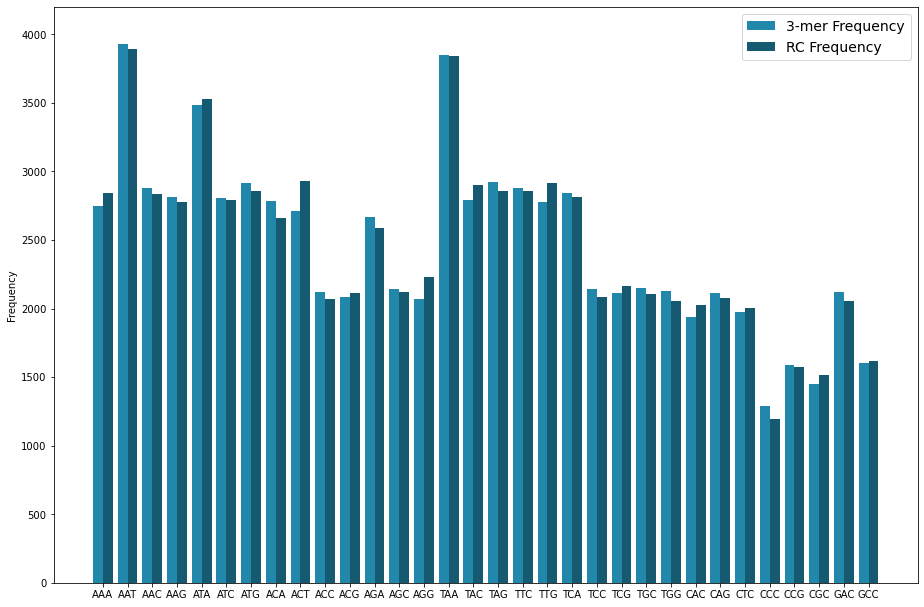

In [6]:
at, cg = utils.at_cg_count(BRCA1)
sequence = utils.random_sequence_cg(len(BRCA1), cg / (at + cg))
tmer_count, rc_count = utils.count_kmers(sequence, three_mers)

data = [tmer_count, rc_count]
X = np.arange(32)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(X - 0.2, data[0], color = '#2187ab', width = 0.4)
ax.bar(X + 0.2, data[1], color = '#165a72', width = 0.4)
ax.bar(three_mers, empty)
ax.set_ylabel('Frequency')
plt.legend(['3-mer Frequency', 'RC Frequency'],loc=1,prop={'size': 14})
plt.ylim([0, 4200])

Better! Now we see that some 3-mers show up more often than others, but the second parity rule is still followed, though it's still not quite what we observed up there. This was far enough to convince myself that this was a reasonable explanation, because presumably you could keep modifying the distribution to get a perfect match.

Other researchers have gone farther than me and found success. Sagi Shporer, Benny Chor, Saharon Rosset, and David Horn did one such investigation. The rest of this document will be a brief summary of what they found, but I encourage you to read it for yourself for more information.

As we see in the green graph above, not all sequences obey the second parity rule perfectly. We can measure how "well" a given sequence obeys the parity rule by taking this ratio, where $S_k$ represents the frequency of a sequence of length $k$ and $S_k^{inv}$ represents the frequency of its reverse complement:

$(S_k - S_k^{inv}) / (S_k + S_k^{inv})$

Average all of these counts together and you have an idea of how well the second parity rule is followed for sequences of length $k$. The researchers posited that, if this average is below 0.1, then the second parity rule is a valid phenomenon. Additionally, the k-value that's closest to 0.1 is called the "$k$-limit", and represents the point at which the second parity rule goes from being valid to invalid.

Of course, in the real world, we know that the second parity rule occurs. This discussion of $k$-limits and ratios is entirely to evaluate their statistical models, and to conclude whether or not they are a valid model for explaining the second parity rule.

Their statistical model was a Poisson distribution, where the counts of any given sequence are random. They defined $X(S, S^*) = (S - S^*) / (S + S^*)$, where $S$ and $S^*$ represent the frequencies of any two sequences. This is the ratio from before, so if their model is correct, $X(S, S^*)$ should be less than 0.1 when $S^* = S^{inv}$. They then calculated the expected values for these frequencies using their distribution, then evaluated whether those frequencies satisfied the second parity rule using this $k$-limit metric, and found that their statistical model had high agreement for large values of $k$, but had significant deviations for small values of $k$.

Here the citation:

Shporer S, Chor B, Rosset S, et al. Inversion symmetry of DNA k-mer counts: validity and deviations. BMC Genomics 2016;17:696–708.

And here's a link if you want to read it for yourself:

https://www.ncbi.nlm.nih.gov/pmc?cmd=Search&term=1471-2164%5Bjour%5D+AND+17%5Bvolume%5D+AND+2016%5Bpdat%5D+AND+Shporer%5Bauth%5D

<i>Note: They center their discussion around the concept of "inversion symmetry", but I have chosen to refer to it as the second parity rule instead as they describe the same phenomenon</i>